### Libraries

In [8]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
import openml
#our neural network
from neuralnetwork import Network,FCLayer,ActivationLayer,sigmoid,sigmoid_prime,tanh,tanh_prime,categorical_cross_entropy,categorical_cross_entropy_prime,mse,mse_prime,binary_cross_entropy,binary_cross_entropy_prime,relu,relu_prime
import time
#sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, ConfusionMatrixDisplay, precision_score, make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
import itertools
from imblearn.over_sampling import RandomOverSampler
import random
from neuralnetwork import Network,FCLayer,ActivationLayer
from neuralnetwork import sigmoid,sigmoid_prime,tanh,tanh_prime,categorical_cross_entropy,categorical_cross_entropy_prime,mse,mse_prime,softmax,softmax_prime


### Data

In [9]:
# loading the data
congress = pd.read_csv('data/CongressionalVotingID.shuf.lrn.csv')

In [10]:
congress.head(5)

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,249,republican,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,140,democrat,y,n,y,n,n,y,y,y,y,n,n,n,n,n,y,y
2,383,democrat,y,y,n,y,y,y,n,n,n,n,y,n,y,y,n,unknown
3,201,democrat,n,n,y,n,n,n,y,y,y,n,n,n,n,y,y,y
4,297,republican,n,n,y,y,y,y,n,n,n,y,n,y,y,y,y,y


In [11]:
#Counting the number of samples for each class
print("Number of samples that belong to republican: ", str(len(congress[congress['class']=='republican'])),len(congress[congress['class']=='republican'])/len(congress), '%')
print("Number of samples that belong to democrat: ", str(len(congress[congress['class']=='democrat'])),len(congress[congress['class']=='democrat'])/len(congress), '%')

Number of samples that belong to republican:  81 0.37155963302752293 %
Number of samples that belong to democrat:  137 0.6284403669724771 %


##### Preparing the data

In [12]:
congress['class'] = congress['class'].map({'democrat': 1, 'republican': 0})

In [13]:
X = congress.drop(['class','ID'], axis=1)
Y = congress['class']

##### Binary classification

In [14]:
from sklearn.preprocessing import LabelEncoder

# Perform integer encoding
label_encoder = LabelEncoder()
for col in X.columns:
    X[col] = label_encoder.fit_transform(X[col])
X = X.to_numpy()
Y = Y.to_numpy().reshape(-1,1)


In [15]:
#splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

#splitting into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state = 1234)


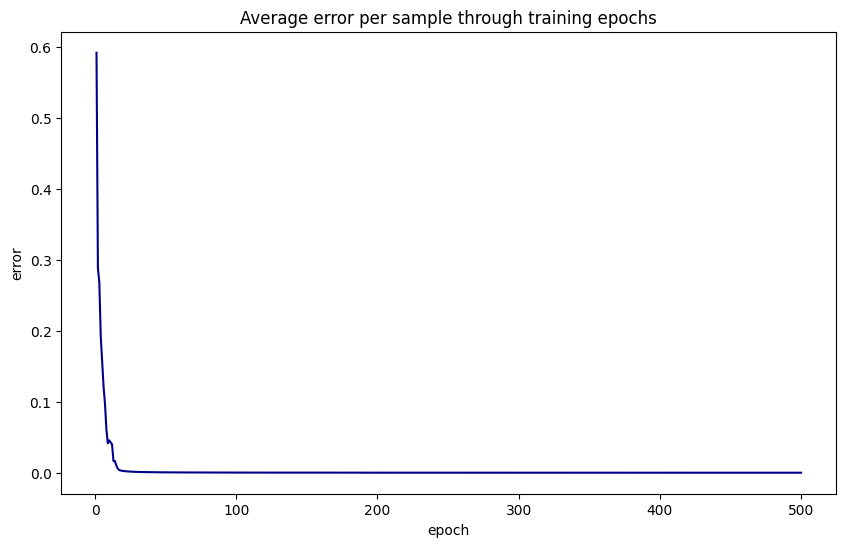

In [16]:
seed = 1234
# network with 2 layers
net = Network()
net.add(FCLayer(16, 10, seed=1234))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(10, 2, seed=1234))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect = net.fit(X_train, y_train, epochs=500, learning_rate=0.1)
net.plot_error_curve(err_vect)

##### 1-hot encoding
Using 1-hot encoding in binary classification is an alternative approach that can be useful in multi-class classification problems or when we want to represent the target variable as a binary vector. However, it is not mandatory for binary classification tasks. But, anyway, let's try with that approach here..

In [17]:
congress = pd.read_csv('data/CongressionalVotingID.shuf.lrn.csv')
congress['class'] = congress['class'].map({'democrat': 1, 'republican': 0})
X = congress.drop(['class','ID'], axis=1)
Y = congress['class']

In [18]:
from sklearn.preprocessing import LabelEncoder

# Perform integer encoding
label_encoder = LabelEncoder()
for col in X.columns:
    X[col] = label_encoder.fit_transform(X[col])
X = X.to_numpy()

encoder = OneHotEncoder(sparse = False)
y_reshaped = Y.to_numpy().reshape(-1,1)
Y = encoder.fit_transform(y_reshaped)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
#splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

#splitting into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state = 1234)


### Our Neural Network Implementation

#### Rectified Linear function in the hidden layers & Sigmoid Function in the outer layers

Since the sigmoid function must be used in the output layer when  building a binary classifier, we used Rectified Linear function (RELU) in the hidden layers. 


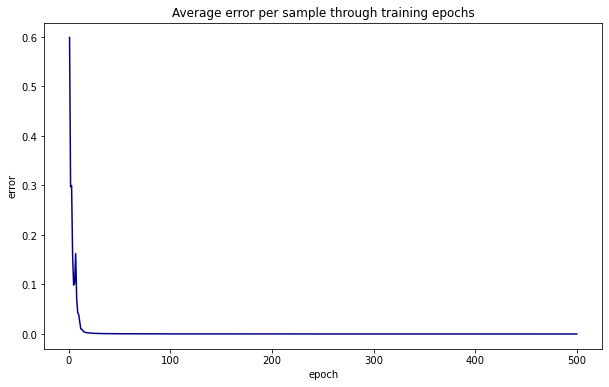

In [13]:
seed = 1234
# network with 2 layers
net = Network()
net.add(FCLayer(16, 10,seed =  1234))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(10,2, seed = 1234))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect = net.fit(X_train, y_train, epochs=500, learning_rate=0.1)
net.plot_error_curve(err_vect)

##################################################
Accuracy on train:  1.0
Accuracy on test:  0.8888888888888888
##################################################
Balanced Accuracy on train:  1.0
Balanced Accuracy on test:  0.9166666666666667
##################################################
Recall on train:  1.0
Recall on test:  0.8333333333333334
##################################################
Precision on train:  1.0
Precision on test:  1.0
##################################################


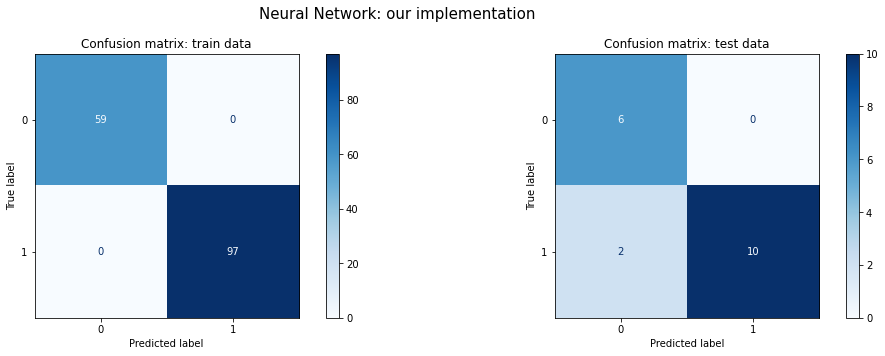

In [14]:
net.nn_evaluate_binary(x_train= X_train, y_train=y_train, x_test=X_val, y_test=y_val, epochs=500, learning_rate=0.1)

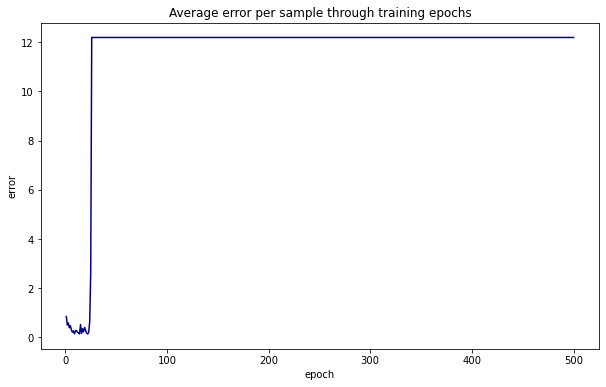

In [15]:
# network with 1 hidden layers
net = Network()
net.add(FCLayer(16, 10,seed = seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(10, 10,seed= seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(10,2,seed = seed))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect = net.fit(X_train, y_train, epochs=500, learning_rate=0.1)
net.plot_error_curve(err_vect)

##################################################
Accuracy on train:  0.6217948717948718
Accuracy on test:  0.6666666666666666
##################################################
Balanced Accuracy on train:  0.5
Balanced Accuracy on test:  0.5
##################################################
Recall on train:  1.0
Recall on test:  1.0
##################################################
Precision on train:  0.6217948717948718
Precision on test:  0.6666666666666666
##################################################


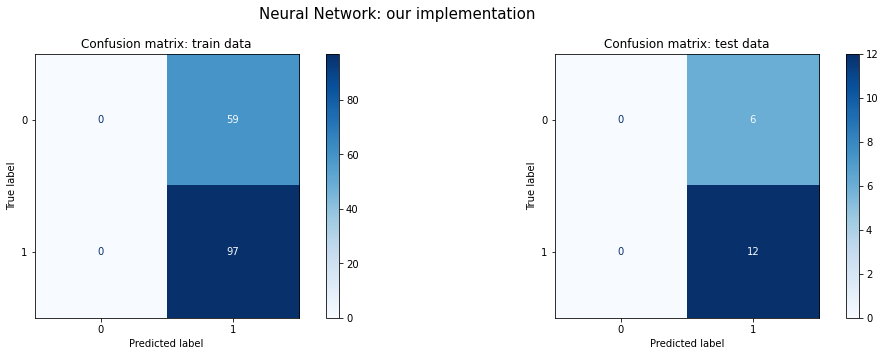

In [16]:
net.nn_evaluate_binary(x_train= X_train, y_train=y_train, x_test=X_val, y_test=y_val, epochs=500, learning_rate=0.1)

### Sigmoid activation function in the outer layer only

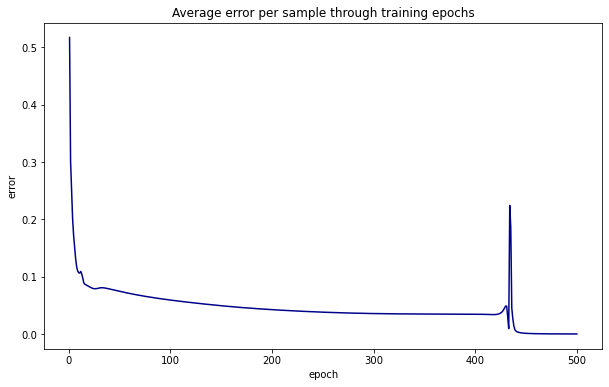

In [17]:
# network with 1 hidden layer
net = Network()
net.add(FCLayer(16, 10,seed =  1234))  
net.add(FCLayer(10,2,seed = 1234))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect = net.fit(X_train, y_train, epochs=500, learning_rate=0.1)
net.plot_error_curve(err_vect)

##################################################
Accuracy on train:  1.0
Accuracy on test:  0.8888888888888888
##################################################
Balanced Accuracy on train:  1.0
Balanced Accuracy on test:  0.9166666666666667
##################################################
Recall on train:  1.0
Recall on test:  0.8333333333333334
##################################################
Precision on train:  1.0
Precision on test:  1.0
##################################################


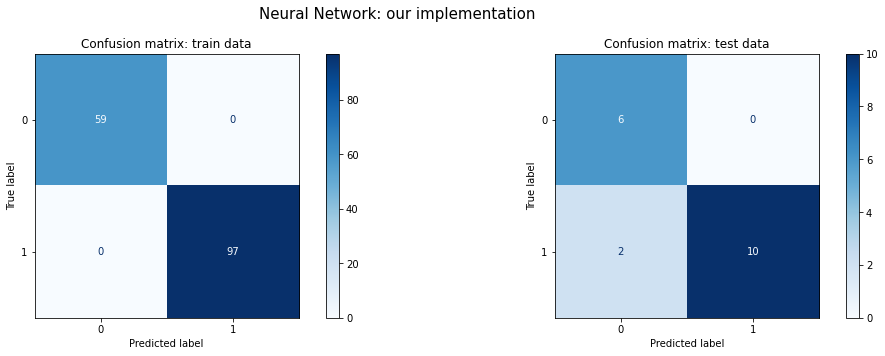

In [18]:
net.nn_evaluate_binary(x_train= X_train, y_train=y_train, x_test=X_val, y_test=y_val, epochs=500, learning_rate=0.1)

D:\Machine Learning\Exercises\Exercise 2\neuralnetwork.py:494: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


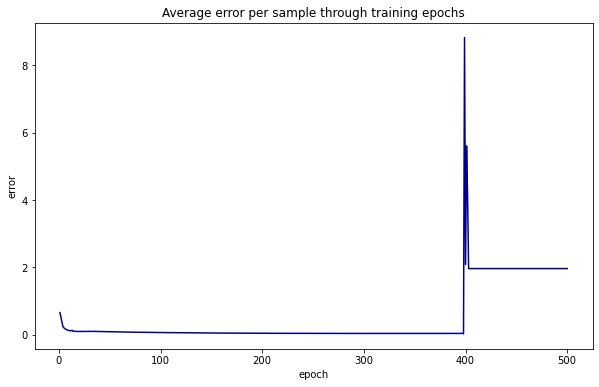

In [19]:
# network with 3 layers
net = Network()
net.add(FCLayer(16, 10, seed=seed))  
net.add(FCLayer(10,10, seed=seed))
net.add(FCLayer(10, 2,seed=seed))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect = net.fit(X_train, y_train, epochs=500, learning_rate=0.1)
net.plot_error_curve(err_vect)

D:\Machine Learning\Exercises\Exercise 2\neuralnetwork.py:494: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


##################################################
Accuracy on train:  0.9487179487179487
Accuracy on test:  1.0
##################################################
Balanced Accuracy on train:  0.9355233269264371
Balanced Accuracy on test:  1.0
##################################################
Recall on train:  0.9896907216494846
Recall on test:  1.0
##################################################
Precision on train:  0.9320388349514563
Precision on test:  1.0
##################################################


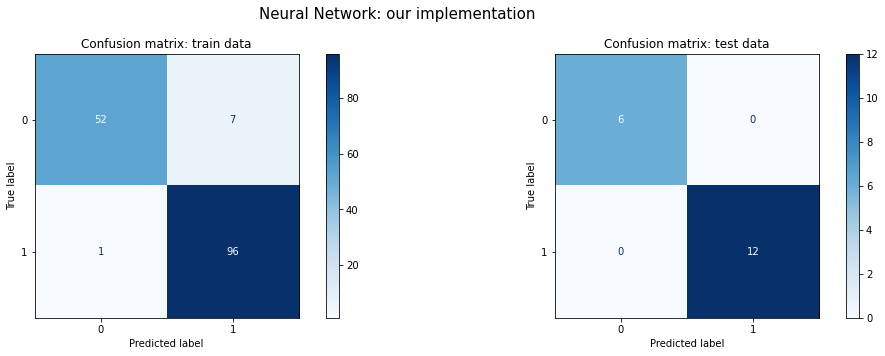

In [20]:
net.nn_evaluate_binary(x_train= X_train, y_train=y_train, x_test=X_val, y_test=y_val, epochs=500, learning_rate=0.1)

#### The impact of initial random weightening

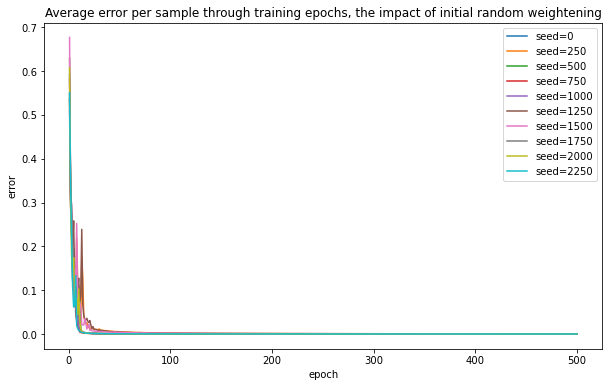

In [23]:
k = 10
plt.figure(figsize=(10, 6))
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('Average error per sample through training epochs, the impact of initial random weightening')

for i in range(0, k):
    # print(i)
    seed = i*250
    
    net = Network()
    net.add(FCLayer(16, 10, seed=seed))  
    net.add(ActivationLayer(relu, relu_prime))
    net.add(FCLayer(10, 2, seed=seed))  
    net.add(ActivationLayer(sigmoid, sigmoid_prime))

    # train
    net.use(binary_cross_entropy, binary_cross_entropy_prime)
    err_vect = net.fit(X_train, y_train, epochs=500, learning_rate=0.1)

    plt.plot(np.arange(1, len(err_vect)+1, 1), err_vect, '-', label='seed='+str(i*250))
plt.legend()
plt.show()



#### The impact of learning rate

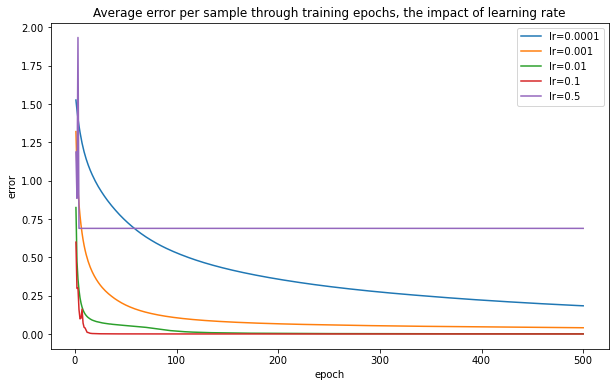

In [24]:
plt.figure(figsize=(10, 6))
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('Average error per sample through training epochs, the impact of learning rate')

lr_vect = np.array([0.0001, 0.001, 0.01, 0.1, 0.5])
k = len(lr_vect)

for i in range(0, k):
    # print(i)
    seed = 1234
    net = Network()
    net.add(FCLayer(16, 10, seed=seed))  
    net.add(ActivationLayer(relu, relu_prime))
    net.add(FCLayer(10, 2, seed=seed))  
    net.add(ActivationLayer(sigmoid, sigmoid_prime))

    # train
    net.use(binary_cross_entropy, binary_cross_entropy_prime)
    lr = lr_vect[i]
    err_vect = net.fit(X_train, y_train, epochs=500, learning_rate=lr)

    plt.plot(np.arange(1, len(err_vect)+1, 1), err_vect, '-', label='lr='+str(lr))
    
plt.legend()
plt.show()


The learning rate affects how quickly the model converges to an optimal solution. If the learning rate is too high, the model may overshoot the optimal solution and fail to converge (that happened for lr=0.5). On the other hand, if the learning rate is too low, the convergence may be slow, and it might take a long time for the model to reach the optimal solution (lr=0.0001 need more epochs to reach error=0).

#### The impact of training - testing split

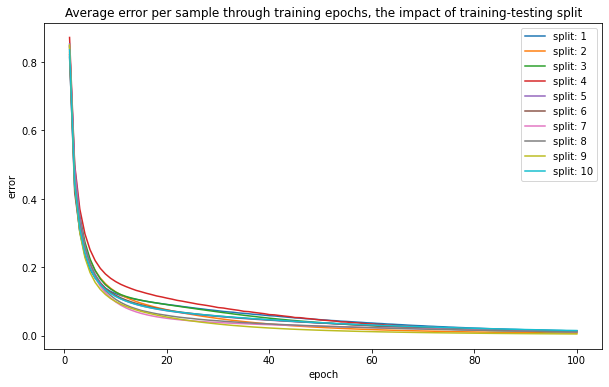

In [29]:
plt.figure(figsize=(10, 6))
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('Average error per sample through training epochs, the impact of training-testing split')

X = congress.drop(['class','ID'], axis=1)
Y = congress['class']
# Perform integer encoding
label_encoder = LabelEncoder()
for col in X.columns:
    X[col] = label_encoder.fit_transform(X[col])
X = X.to_numpy()

encoder = OneHotEncoder(sparse = False)
y_reshaped = Y.to_numpy().reshape(-1,1)
Y = encoder.fit_transform(y_reshaped)

k = 10

for i in range(0, k):
    # splitting into train and test set
    # print(i)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    #splitting into train and validation set
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=i)
    
    seed = 1234
    
    net = Network()
    net.add(FCLayer(16, 10, seed=seed))  
    net.add(ActivationLayer(relu, relu_prime))
    net.add(FCLayer(10, 2, seed=seed))  
    net.add(ActivationLayer(sigmoid, sigmoid_prime))

    # train
    net.use(binary_cross_entropy, binary_cross_entropy_prime)
    err_vect = net.fit(X_train, y_train, epochs=100, learning_rate=0.01)

    plt.plot(np.arange(1, len(err_vect)+1, 1), err_vect, '-', label='split: '+str(i+1))
    
plt.legend()
plt.show()

Seems like every split gives good results...

#### Loss on validation set -> validation curve

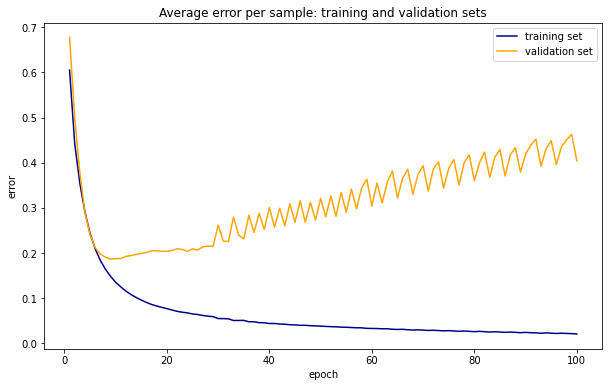

In [36]:
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed)
    
net = Network()
net.add(FCLayer(16, 10, seed=seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(10, 2, seed=seed))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect_train, err_vect_val = net.fit_plus_validation(X_train, y_train, X_val, y_val, epochs=100, learning_rate=0.01)


plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(err_vect_train)+1, 1), err_vect_train, '-', color='darkblue', label='training set')
plt.plot(np.arange(1, len(err_vect_val)+1, 1), err_vect_val, '-', color='orange', label='validation set')

plt.xlabel('epoch')
plt.ylabel('error')
plt.legend()
plt.title('Average error per sample: training and validation sets')
plt.show()

Let's see what happens when we stop training on 20. epoch...

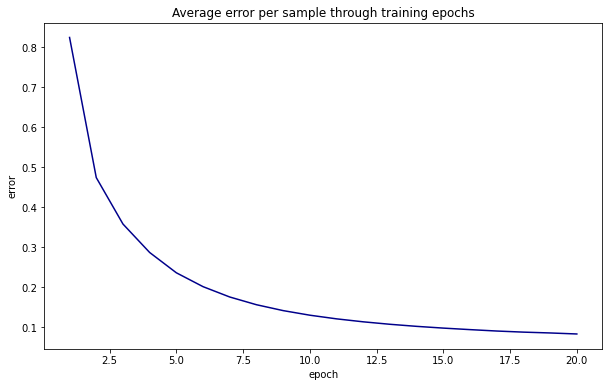

In [14]:
seed = 1234
net = Network()
net.add(FCLayer(16, 10, seed=seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(10, 2, seed=seed))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect = net.fit(X_train, y_train, epochs=20, learning_rate=0.01)
net.plot_error_curve(err_vect)

##################################################
Accuracy on train:  0.9935897435897436
Accuracy on test:  0.9444444444444444
##################################################
Balanced Accuracy on train:  0.9947916666666667
Balanced Accuracy on test:  0.9615384615384616
##################################################
Recall on train:  0.9895833333333334
Recall on test:  0.9230769230769231
##################################################
Precision on train:  1.0
Precision on test:  1.0
##################################################


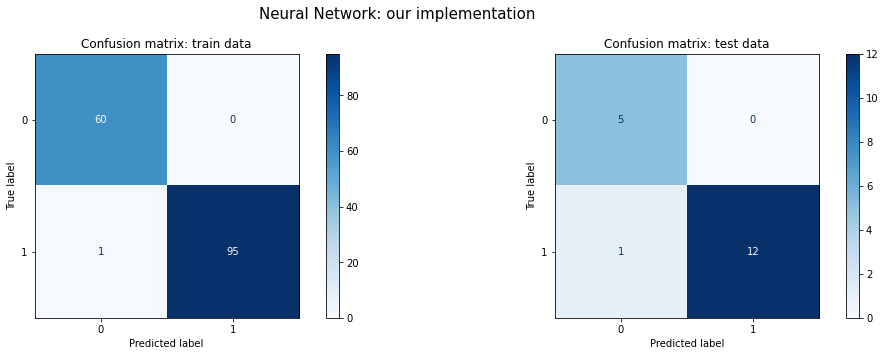

In [41]:
net.nn_evaluate_binary(x_train=X_train, y_train=y_train, x_test=X_val, y_test=y_val, epochs=20, learning_rate=0.01)

#### Batch approach
Until now incremental approach was performed and weights were updated after every training sample. Let's propagate whole training set now and after that update the weights.

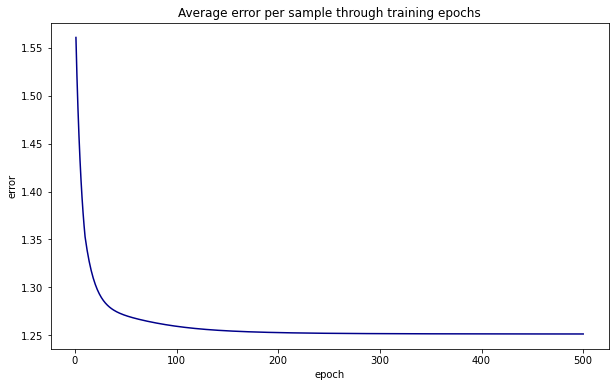

In [20]:
seed = 1234
net = Network()
net.add(FCLayer(16, 10, seed=seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(10, 2, seed=seed))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect = net.fit_batch(X_train, y_train, epochs=500, learning_rate=0.01)
net.plot_error_curve(err_vect)

Got stuck in sub-optimal solution, even for lower lr and greater number of epochs...

#### Mini-batch approach

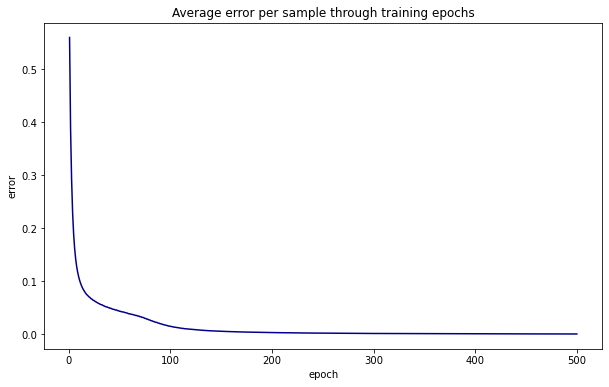

In [22]:
# Examining mini-batch method: for batch_size=1 it should give the same output as standard incremental (fit)
seed = 1234
net = Network()
net.add(FCLayer(16, 10, seed=seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(10, 2, seed=seed))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect = net.fit_mini_batch(X_train, y_train, epochs=500, learning_rate=0.01, batch_size=1)
net.plot_error_curve(err_vect)

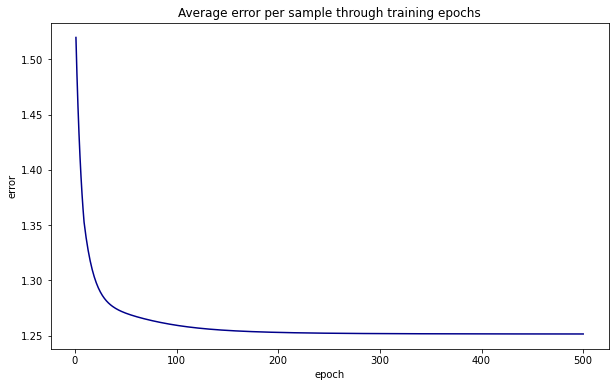

In [23]:
# Examining mini-batch method: for batch_size=num_samples it should give the same output as batch_fit
seed = 1234
net = Network()
net.add(FCLayer(16, 10, seed=seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(10, 2, seed=seed))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

num_samples = y_train.shape[0]
err_vect = net.fit_mini_batch(X_train, y_train, epochs=500, learning_rate=0.01, batch_size=num_samples)
net.plot_error_curve(err_vect)

D:\Machine Learning\Exercises\Exercise 2\neuralnetwork.py:543: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


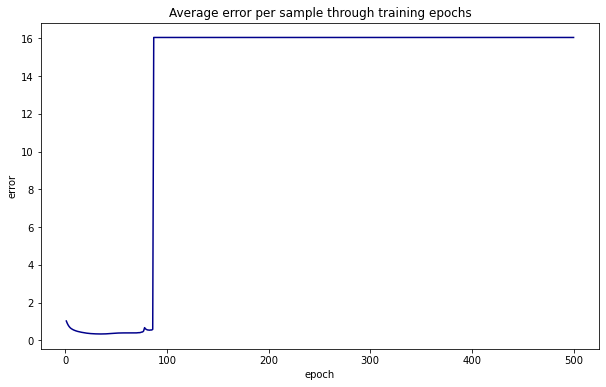

In [27]:
# batch_size = 3
seed = 1234
net = Network()
net.add(FCLayer(16, 10, seed=seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(10, 2, seed=seed))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

num_samples = y_train.shape[0]
err_vect = net.fit_mini_batch(X_train, y_train, epochs=500, learning_rate=0.01, batch_size=3)
net.plot_error_curve(err_vect)

Diverging... :( overflow happened


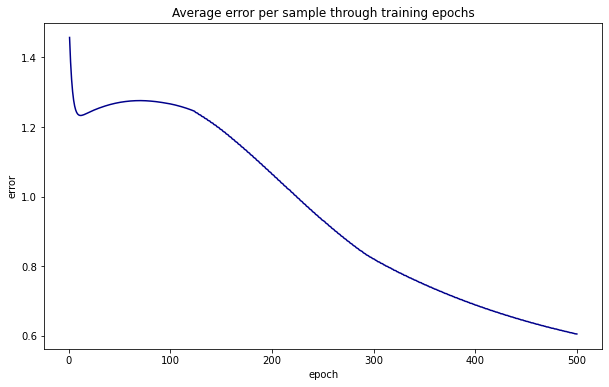

In [33]:
# batch_size = 35
seed = 1234
net = Network()
net.add(FCLayer(16, 10, seed=seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(10, 2, seed=seed))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

num_samples = y_train.shape[0]
err_vect = net.fit_mini_batch(X_train, y_train, epochs=500, learning_rate=0.01, batch_size=35)
net.plot_error_curve(err_vect)

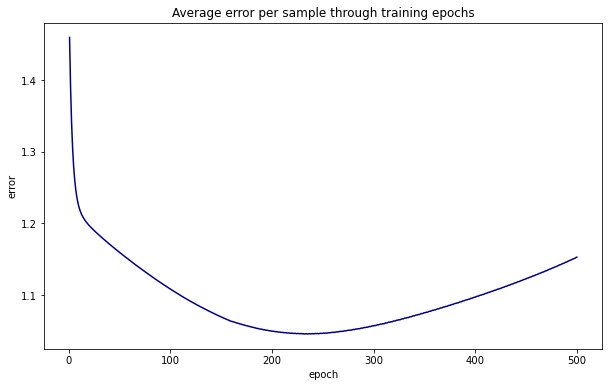

In [34]:
# batch_size = 45
seed = 1234
net = Network()
net.add(FCLayer(16, 10, seed=seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(10, 2, seed=seed))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

num_samples = y_train.shape[0]
err_vect = net.fit_mini_batch(X_train, y_train, epochs=500, learning_rate=0.01, batch_size=45)
net.plot_error_curve(err_vect)

###  L2 Regularization (Ridge)

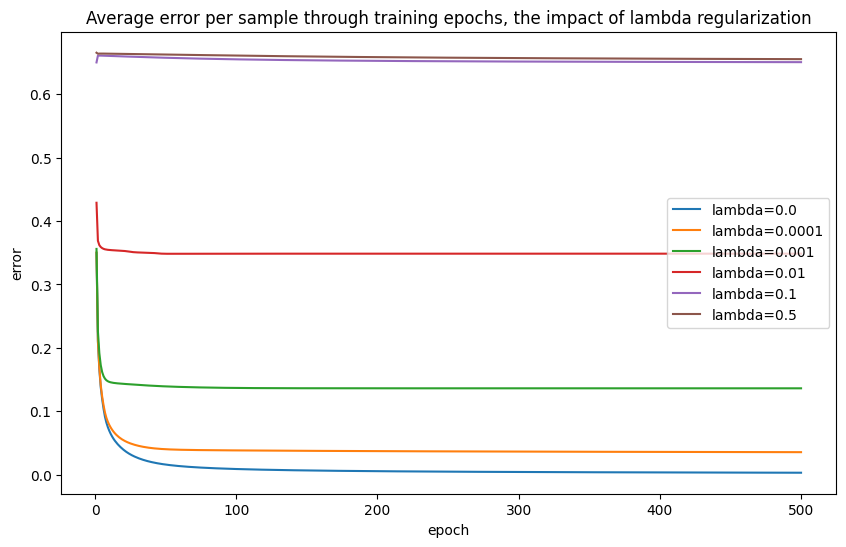

In [100]:
plt.figure(figsize=(10, 6))
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('Average error per sample through training epochs, the impact of lambda regularization')

lambda_vect = np.array([0,0.0001, 0.001, 0.01, 0.1, 0.5])
k = len(lambda_vect)

for i in range(0,k):

    net = Network()
    net.add(FCLayer(16, 10,seed=seed))  
    net.add(ActivationLayer(tanh, tanh_prime))
    net.add(FCLayer(10, 2, seed=seed))  
    net.add(ActivationLayer(softmax, softmax_prime))
    net.use(categorical_cross_entropy, categorical_cross_entropy_prime)
    l = lambda_vect[i]
    err_vect = net.fit_plus_ridge(X_train, y_train, epochs=500, learning_rate=0.1, reg_lambda = l )

    plt.plot(np.arange(1, len(err_vect)+1, 1), err_vect, '-', label='lambda='+str(l))
    
plt.legend()
plt.show()


The train error plot is highly influenced by the value of the lambda parameter. As seen below, when lambda is too low, the regularization effect is very minimal and the training error shows a decreasing tendence. Moreover, the blue plot (lambda = 0.0001) is quite similar to our other initial plots above due to lambda being almost 0. On the other side, as lambda increases, the training error also increases and the model may be prone to underfitting.

### Randomized search with CV to find the best parameter combination

In [44]:
#parameter grid
params = {
    'hidden_layer_size': [2,3,4,5,6],
    'activation': ['relu+sigmoid','sigmoid'],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.5],
    'reg_lambda' : [0.0001, 0.001, 0.005,0.01,0.05, 0.1, 0.5,1],
    'epochs': [200, 500,700,1000],
    'node_numbers' : [5,10,15]
}

input_size = 16
output_size = 2
accuracy_dict = {}
best_accuracy = 0
best_parms = {}
seed = 1234

In [45]:
start = time.time()
random.seed(seed)
#we are going to perform randomized search for 10 randomly chosen parameter combinations
for i in range(10):
    layers = random.sample(params['hidden_layer_size'], 1)[0]
    activation = random.sample(params['activation'], 1)[0]
    learning_rate = random.sample(params['learning_rate'], 1)[0]
    nodes = random.sample(params['node_numbers'], 1)[0]
    epochs = random.sample(params['epochs'], 1)[0]
    reg_lambda =  random.sample(params['reg_lambda'], 1)[0]

    kf = KFold(n_splits=5, shuffle=True,random_state = seed)
    accuracy_scores = []
    for train_index, val_index in kf.split(X_train):
        # Split the data into training and validation sets
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        net = Network()
        net.add(FCLayer(input_size, nodes,seed = seed))
        if activation == 'sigmoid':
            for _ in range(layers - 1):
                net.add(FCLayer(nodes, nodes,seed = seed))
        else:
            net.add(ActivationLayer(relu, relu_prime))
            for _ in range(layers - 1):
                net.add(FCLayer(nodes, nodes,seed = seed))
                net.add(ActivationLayer(relu, relu_prime))
        net.add(FCLayer(nodes, output_size,seed = seed))
        net.add(ActivationLayer(sigmoid, sigmoid_prime))
        net.use(binary_cross_entropy, binary_cross_entropy_prime)

        net.fit_plus_ridge(X_train_fold, y_train_fold, epochs=epochs, learning_rate=learning_rate,reg_lambda = reg_lambda)
        y_val_pred = net.predict(X_val_fold)
        y_val_pred = np.concatenate(y_val_pred)

        # Convert one-hot encoded predictions back to class labels
        y_val_pred_labels = np.argmax(y_val_pred, axis=1)
        y_val_labels = np.argmax(y_val_fold, axis=1)

        accuracy = accuracy_score(y_val_labels,y_val_pred_labels)
        accuracy_scores.append(accuracy)
    avg_accuracy = np.mean(accuracy_scores)
    if avg_accuracy > best_accuracy:
                    best_accuracy = avg_accuracy
                    best_params = {
                        'hidden_layer_size': layers,
                        'number_of_nodes':nodes,
                        'activation': activation,
                        'learning_rate': learning_rate,
                        'reg_lambda':reg_lambda,
                        'epochs':epochs}
    
    accuracy_dict[(layers,activation,nodes,learning_rate,reg_lambda,epochs)] = accuracy_scores

end = time.time()

/Users/nadia/Desktop/TUSS23/ML/Exercise 2/MachineLearningEx2/neuralnetwork.py:546: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/Users/nadia/Desktop/TUSS23/ML/Exercise 2/MachineLearningEx2/neuralnetwork.py:546: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/Users/nadia/Desktop/TUSS23/ML/Exercise 2/MachineLearningEx2/neuralnetwork.py:546: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/Users/nadia/Desktop/TUSS23/ML/Exercise 2/MachineLearningEx2/neuralnetwork.py:546: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/Users/nadia/Desktop/TUSS23/ML/Exercise 2/MachineLearningEx2/neuralnetwork.py:546: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


In [46]:
print("Time needed to run cross validation for best parameter combination "+ str((end-start)/60)+ " minutes.")

Time needed to run cross validation for best parameter combination 15.388274765014648 minutes.


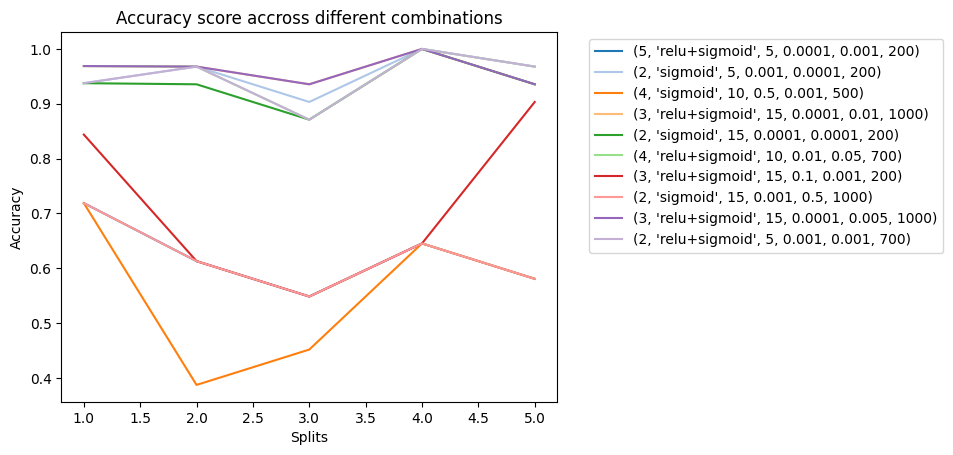

In [47]:
cmap = plt.get_cmap('tab20')
for i,c in enumerate(accuracy_dict):
   color = cmap(i)
   plt.plot(np.arange(1, len(accuracy_dict[c])+1, 1), accuracy_dict[c], '-', label=str(c),color = color)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Accuracy score accross different combinations")
plt.ylabel('Accuracy')
plt.xlabel('Splits')
plt.show()

In [48]:
print(f'The highest accuracy of {best_accuracy} was achieved with the following parameters:\n {best_params}')


The highest accuracy of 0.961491935483871 was achieved with the following parameters:
 {'hidden_layer_size': 3, 'number_of_nodes': 15, 'activation': 'relu+sigmoid', 'learning_rate': 0.0001, 'reg_lambda': 0.01, 'epochs': 1000}


#### Testing the best model on test set

In [39]:
net = Network()
net.add(FCLayer(16, 15,seed =  seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(15,15,seed = seed))
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(15,15,seed = seed)) 
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(15,15,seed = seed))
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(15,2,seed = seed)) 
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect = net.fit_plus_ridge(X_train, y_train, epochs=1000, learning_rate=0.0001, reg_lambda=0.01)

##################################################
Accuracy on train:  1.0
Accuracy on test:  1.0
##################################################
Balanced Accuracy on train:  1.0
Balanced Accuracy on test:  1.0
##################################################
Recall on train:  1.0
Recall on test:  1.0
##################################################
Precision on train:  1.0
Precision on test:  1.0
##################################################


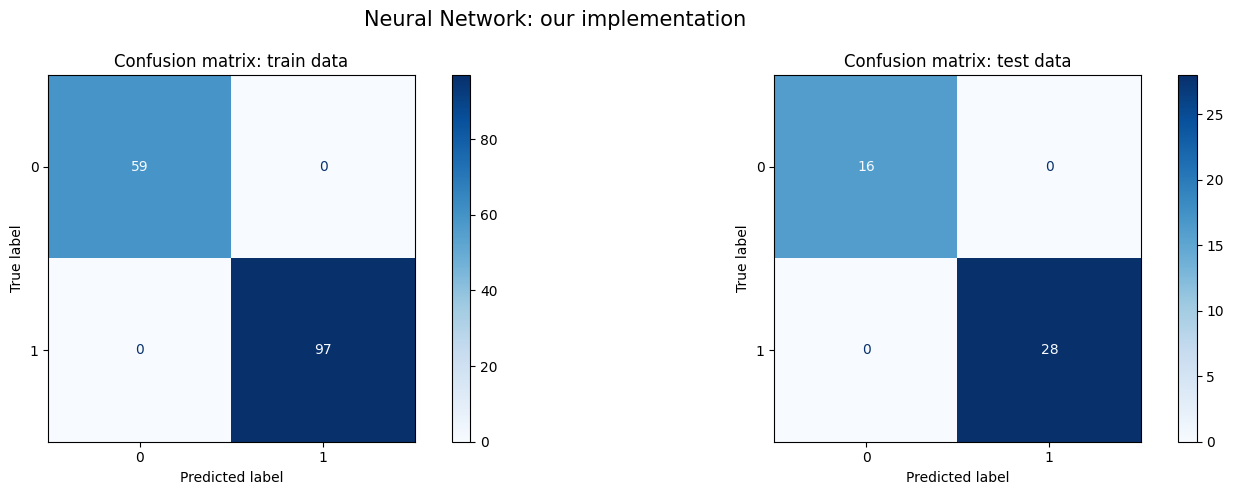

In [41]:
net.nn_evaluate_binary(x_train= X_train, y_train=y_train, x_test=X_test, y_test=y_test, epochs=1000, learning_rate=0.001,mode = 'ridge',reg_lambda=0.01)

### Comparison: effectiveness & efficiency (for the best model)

In [42]:
seed = 1234
net = Network()
net.add(FCLayer(16, 5, seed=seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(5, 5, seed=seed))
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(5, 5, seed=seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(5, 5, seed=seed)) 
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(5, 2, seed=seed)) 
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

num_samples = y_train.shape[0]
batch_size_vect = np.array([2, 3, 35, 45, 50])
combinations = len(batch_size_vect) + 2

acc_train = np.zeros(combinations)
acc_test = np.zeros(combinations)
elapsed_time = np.zeros(combinations)


# 0. incremental approach
start = time.time()
acc_train[0], acc_test[0] = net.nn_evaluate_one_hot_without_plotting(x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test, epochs=1000, learning_rate=0.0001, reg_lambda = 0.01, batch_mode='ridge')
end = time.time()
elapsed_time[0] = end - start

# mini-batch approach
for i in range(0, len(batch_size_vect)):
    print(i)
    net = Network()
    net.add(FCLayer(16, 5, seed=seed))  
    net.add(ActivationLayer(relu, relu_prime))
    net.add(FCLayer(5, 5, seed=seed))
    net.add(ActivationLayer(relu, relu_prime))
    net.add(FCLayer(5, 5, seed=seed))  
    net.add(ActivationLayer(relu, relu_prime))
    net.add(FCLayer(5, 5, seed=seed)) 
    net.add(ActivationLayer(relu, relu_prime))
    net.add(FCLayer(5, 2, seed=seed)) 
    net.add(ActivationLayer(sigmoid, sigmoid_prime))

    # train
    net.use(binary_cross_entropy, binary_cross_entropy_prime)

    batch_size = batch_size_vect[i]
    start = time.time()
    acc_train[i+1], acc_test[i+1] = net.nn_evaluate_one_hot_without_plotting(X_train, y_train, X_test, y_test, epochs=1000, learning_rate=0.0001, mode='mini_batch', batch_size=batch_size, reg_lambda=0.01, batch_mode='ridge')
    end = time.time()
    elapsed_time[i+1] = end - start
    
    
net = Network()
net.add(FCLayer(16, 5, seed=seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(5, 5, seed=seed))
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(5, 5, seed=seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(5, 5, seed=seed)) 
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(5, 2, seed=seed)) 
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

# batch approach
start = time.time()
acc_train[combinations-1], acc_test[combinations-1] = net.nn_evaluate_one_hot_without_plotting(X_train, y_train, X_test, y_test, epochs=1000, learning_rate=0.0001, mode='batch', reg_lambda=0.01, batch_mode='ridge')
end = time.time()
elapsed_time[combinations-1] = end - start

0
1
2
3
4


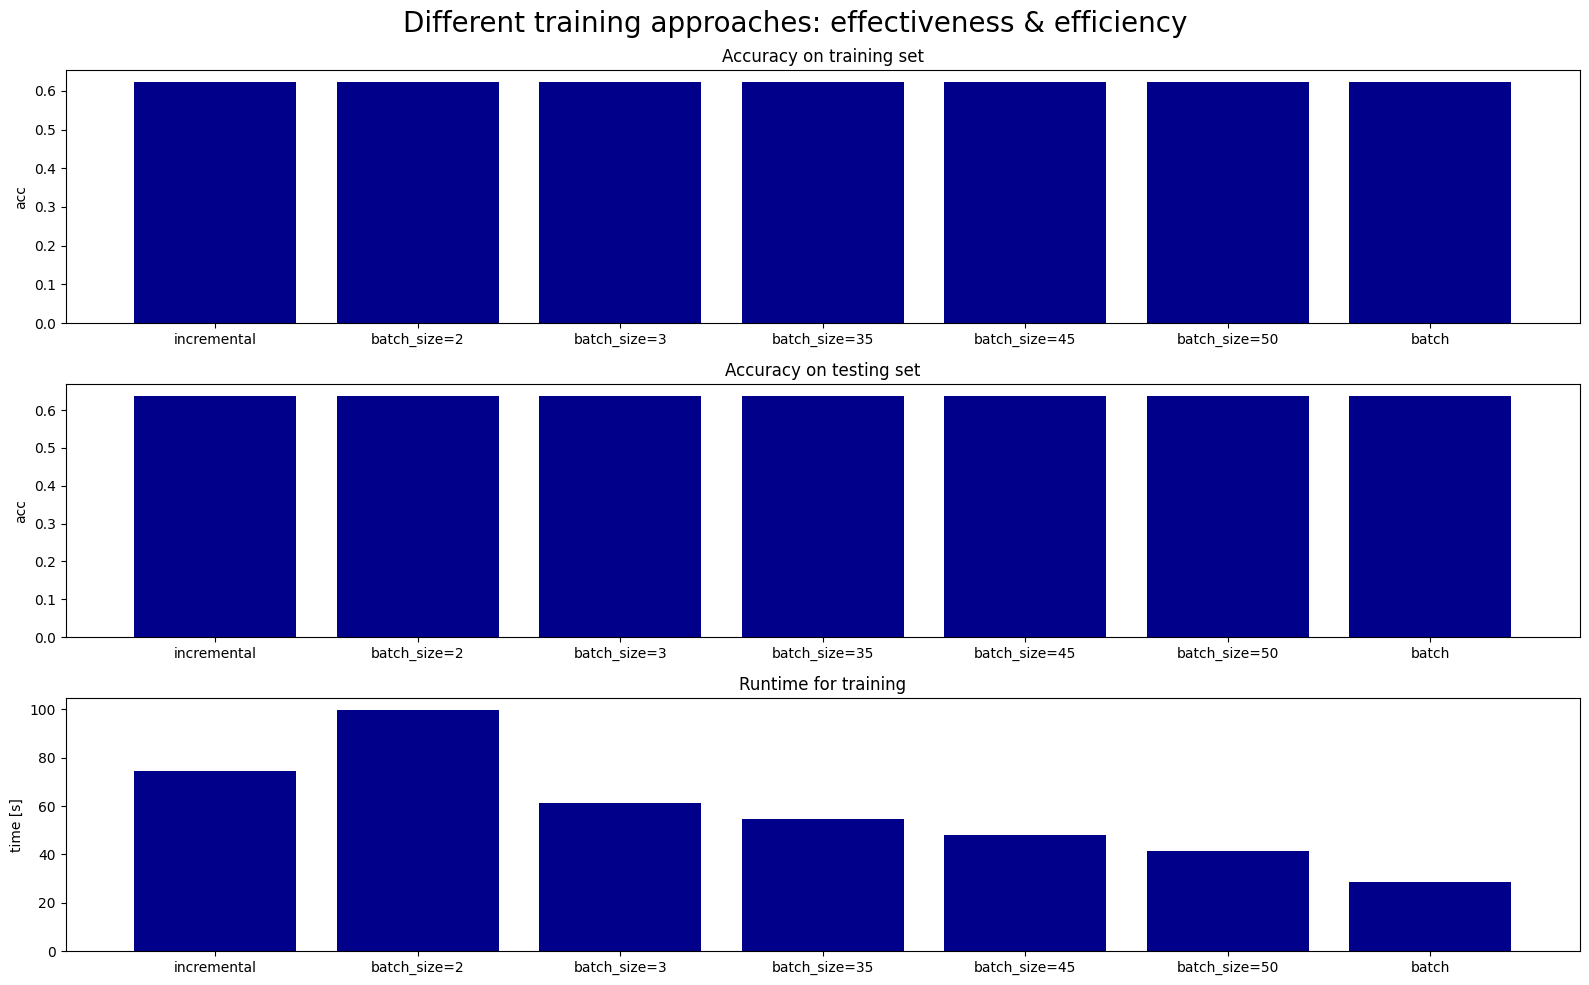

In [43]:
cat = ['incremental', 'batch_size=2', 'batch_size=3', 'batch_size=35', 'batch_size=45', 'batch_size=50', 'batch']
fig, axs = plt.subplots(3, 1, figsize=(16, 10))

axs[0].bar(cat, acc_train, color='darkblue')
axs[0].set_title('Accuracy on training set')
axs[0].set_ylabel('acc')

# Second subplot
axs[1].bar(cat, acc_test, color='darkblue')
axs[1].set_title('Accuracy on testing set')
axs[1].set_ylabel('acc')

# Third subplot
axs[2].bar(cat, elapsed_time, color='darkblue')
axs[2].set_title('Runtime for training')
axs[2].set_ylabel('time [s]')

plt.suptitle('Different training approaches: effectiveness & efficiency', fontsize=20)
plt.tight_layout()
plt.show()